https://www.analyticsvidhya.com/blog/2020/10/how-to-create-an-arima-model-for-time-series-forecasting-in-python/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("D:\Python\ML\Datasets\shampoo.csv",parse_dates=True,index_col='Month')

In [9]:
df.head()

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


<AxesSubplot:xlabel='Month'>

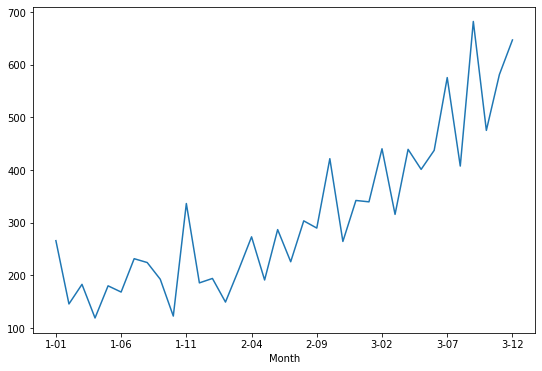

In [13]:
from pylab import rcParams
rcParams['figure.figsize']  = 9,6
df['Sales'].plot()

In [16]:
# check stationarity
from statsmodels.tsa.stattools import adfuller
def check(x):
    result = adfuller(x)
    if result[1] < 0.05:
        return 'It is Stationary',result[1]
    else:
        return 'It is non-Stationary',result[1]

In [17]:
check(df['Sales'])

('It is non-Stationary', 1.0)

In [19]:
# make it as stationary

df['diff1'] = df['Sales'] - df['Sales'].shift(1)
check(df['diff1'].dropna())

('It is Stationary', 1.7998574141687034e-10)

<AxesSubplot:xlabel='Month'>

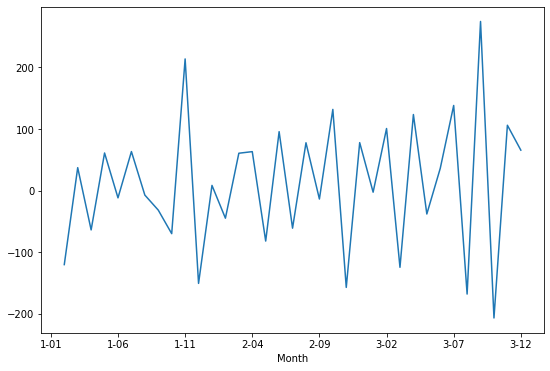

In [20]:
df['diff1'].plot()

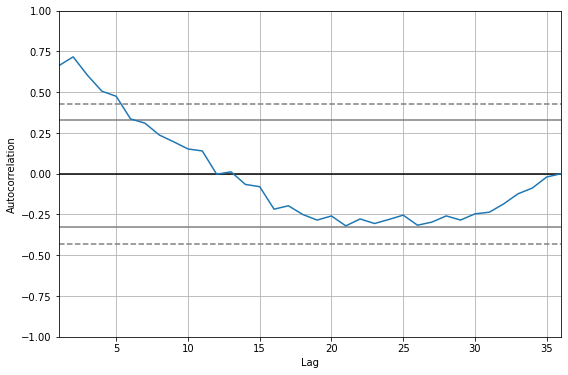

In [21]:
# d = 1
# Calculating Order p
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()


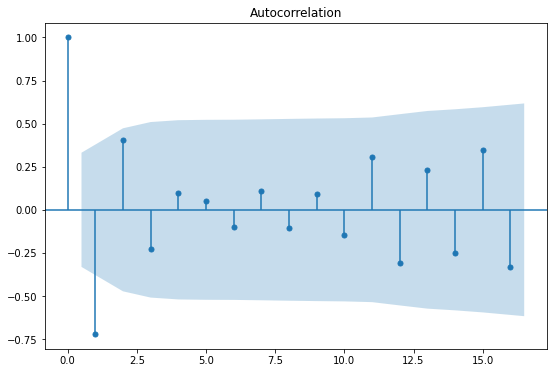

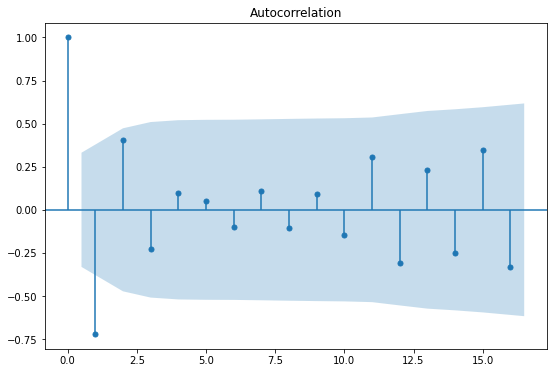

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(df['diff1'].dropna())

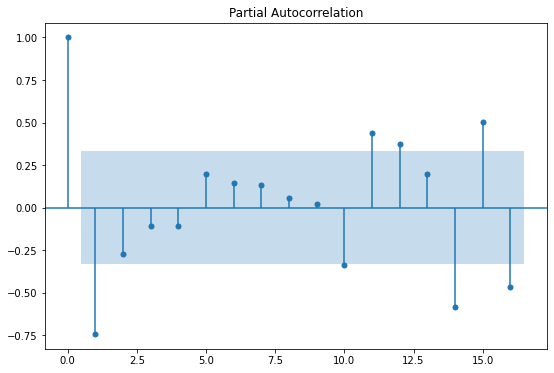

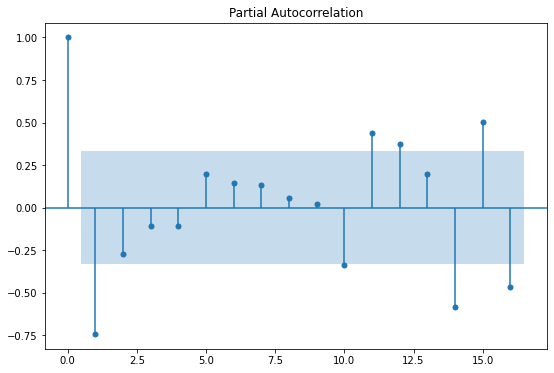

In [25]:
plot_pacf(df['diff1'].dropna())

C:\Users\Win\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


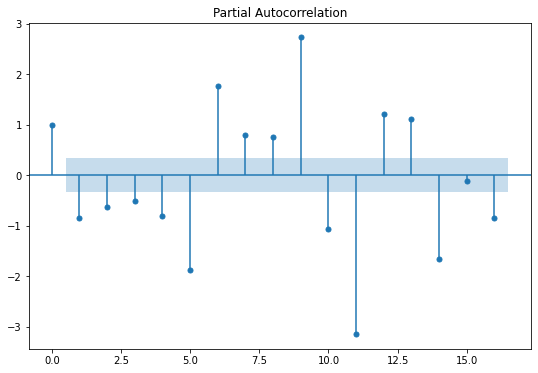

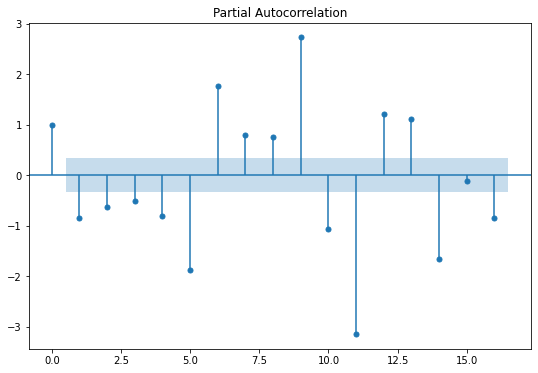

In [30]:
# diff 2
df['diff2'] = df['diff1'] -df['diff1'].shift(1)
plot_pacf(df['diff2'].dropna(),)

In [48]:
# p = 7,d  = 2,q = 1
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df['Sales'],order=(7,2,1))
model_fitted = model.fit()
model_fitted.summary()

C:\Users\Win\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Win\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupport

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Sales   No. Observations:                   34
Model:                 ARIMA(7, 2, 1)   Log Likelihood                -189.324
Method:                       css-mle   S.D. of innovations             55.507
Date:                Tue, 11 May 2021   AIC                            398.648
Time:                        23:24:07   BIC                            413.912
Sample:                             2   HQIC                           403.853
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.8913      0.217      4.114      0.000       0.467       1.316
ar.L1.D2.Sales    -1.3516      0.181     -7.478      0.000      -1.706      -0.997
ar.L2.D2.Sales    -1.1133      0.316     -3.524      0.000      -1.732      -0.494
ar.L3.D2.Sales    -0.9196      0.384     -2.392      0.017      -1.673      -0.166
ar.L4.D2.Sales    -0.5946      0.421     -1.413      0.158      -1.419       0.230
ar.L5.D2.Sales    -0.1565      0.398     -0.393      0.694      -0.936       0.623
ar.L6.D2.Sales    -0.0153      0.339     -0.045      0.964      -0.681       0.650
ar.L7.D2.Sales     0.0365      0.206      0.177      0.859      -0.367       0.440
ma.L1.D2.Sales    -1.0000      0.093    -10.800      0.000      -1.181      -0.819
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1175           -0.4729j            1.2134           -0.4363
AR.2           -1.1175           +0.4729j            1.2134            0.4363
AR.3            0.3352           -1.2327j            1.2775           -0.2077
AR.4            0.3352           +1.2327j            1.2775            0.2077
AR.5           -0.8186           -1.5732j            1.7734           -0.3264
AR.6           -0.8186           +1.5732j            1.7734            0.3264
AR.7            3.6218           -0.0000j            3.6218           -0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Month'>

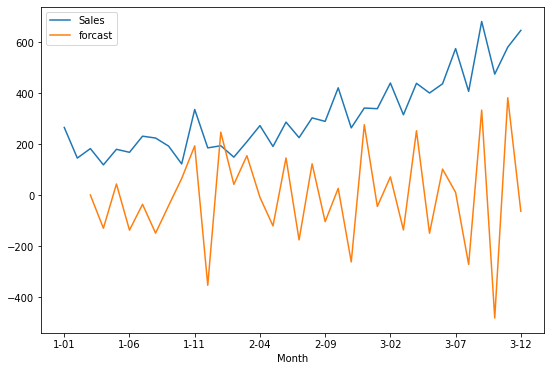

In [63]:
df['forcast'] = model_fitted.predict()
# df[['Sales','forcast']].plot()
df[['Sales','forcast']].plot()
